In [1]:
import numpy as np
from numpy import cos, sqrt, pi, exp, conj, dot
from numpy import trapz as Int
import matplotlib.pyplot as plt

In [44]:

def NtD(y, df_dy, k, H, M):

    dfn = np.zeros(M, dtype=np.complex128)
    dfn[0] = Int( df_dy*1/sqrt(2*H), y )
    for n in range(1,M):
        dfn[n] = Int( df_dy*cos(n*pi*y/H)/sqrt(H), y )
    
    f_y = 1/(1j*k)*dfn[0]/sqrt(2*H)*np.ones_like(y) + sum([ 1/(1j*sqrt(complex(k**2 - (n*pi/H)**2)))*dfn[n]*cos(n*pi*y/H)/sqrt(H) for n in range(1,M)])
    return f_y

In [45]:
H = 1 
R = 10

Nx = 100
Ny = 1000
x = np.linspace(-R,R,Nx)
y = np.linspace(-H,H,Ny)
X, Y = np.meshgrid(x,y)
k = 8
beta = lambda n : sqrt(k**2 - (n*pi/H)**2)
n = 1
f = exp(1j*beta(n)*X)*cos(n*pi*Y/H)
N = 1 #normal
grad_f = N*1j*beta(n)*exp(1j*beta(n)*X)*cos(n*pi*Y/H)
#grad_f_y = grad_f[:,0]

a = 0.5*H
grad_f_y = np.where(np.logical_or(y< -a, y> a),0,grad_f[:,0])
#f_y = f[:,0]
f_y = np.where(np.logical_or(y< -a, y> a),0,f[:,0])

M = 500
Nf_y = NtD(y,grad_f_y,k=k,H=H,M=M)

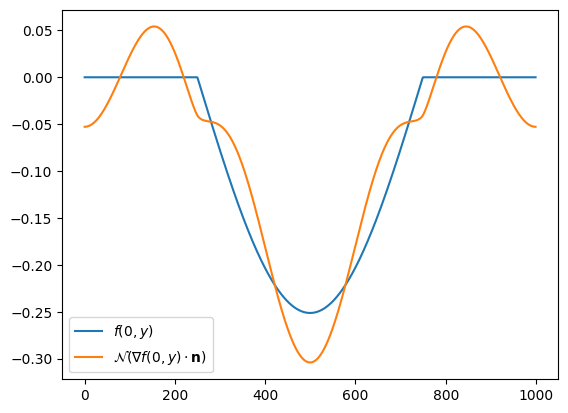

In [46]:
plt.plot(np.real(f_y),label='$f(0,y)$')
plt.plot(np.real(Nf_y),label='$\\mathcal{N}(\\nabla f(0,y)\\cdot \\mathbf{n})$')
plt.legend()


In [50]:
#  Sigma terms:
def Sigma_numeric(P, Q, N, d_m, d_n, k, H, Np, Ny = 100):
    y = np.linspace(P[1], Q[1], Ny)
    x = np.linspace(P[0], Q[0], Ny)
    r = np.array( [x,y] ).transpose()

    gradu = 1j*k*dot(d_n,N)*exp(1j*k*dot(r,d_m))
    gradv = 1j*k*dot(d_m,N)*exp(1j*k*dot(r,d_m))
    v = exp(1j*k*dot(r,d_m))
    return Int( NtD(y,gradu,k,H,Np)*conj(gradv) - gradu*conj(v), y)

In [55]:
P = np.array((-R,-1/3*H))
Q = np.array((-R,-1.0*H))
N = np.array((-1,0))
k_e = 8.0
d_m = np.array([1,-1])/np.sqrt(2)
d_n = np.array([1,1])/np.sqrt(2)
Np = 15
Sigma_numeric(P, Q, N, d_m, d_n, k_e, H, Np=Np)

(-0.2882531803482165-5.215230232743867j)

P=array([-10.        ,  -0.33333333])
Q=array([-10.,  -1.])
N=array([-1,  0])
d_m=array([ 0.70710678, -0.70710678])
d_n=array([0.70710678, 0.70710678])
